In [1]:
import fasttext
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
import fasttext.util

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train = pd.read_csv('train.tsv',sep='\t')

In [4]:
def format_text(df,col):
  #Remove @ tags
  comp_df = df.copy()
    
  # remove all the punctuation
  comp_df[col] = comp_df[col].str.replace(r'(@\w*)','')

  #Remove URL
  comp_df[col] = comp_df[col].str.replace(r"http\S+", "")

  #Remove # tag and the following words
  comp_df[col] = comp_df[col].str.replace(r'#\w+',"")

  #Remove all non-character
  comp_df[col] = comp_df[col].str.replace(r"[^a-zA-Z ]","")

  # Remove extra space
  comp_df[col] = comp_df[col].str.replace(r'( +)'," ")
  comp_df[col] = comp_df[col].str.strip()

  # Change to lowercase
  comp_df[col] = comp_df[col].str.lower()
  comp_df[col] = comp_df[col].str.replace('httpurl', '')
  return comp_df

In [5]:
train = format_text(train,'Text')

In [6]:
X_X = train['Text']
Y_train = train['Label']

In [7]:
le = LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)

In [8]:
X_X = X_X.tolist()
Y_train=Y_train

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(X_X).toarray()

In [10]:
import scipy.signal
def energy(u):
# Estimate PSD `S_xx_welch` at discrete frequencies `f_welch`
    f_welch, S_xx_welch = scipy.signal.welch(u)

    # Integrate PSD over spectral bandwidth
    # to obtain signal power `P_welch`
    df_welch = f_welch[1] - f_welch[0]
    return np.sum(S_xx_welch) * df_welch

In [11]:
from vmdpy import VMD

In [12]:
def maxvdm(f):
    alpha = 2     
    tau = 0.            
    K = 2       
    DC = 0             
    init = 1           
    tol = 1e-7  
    u, u_hat, omega = VMD(f, alpha, tau, K, DC, init, tol) 
    energy_array=[]
    for i in u:
        energy_array.append(energy(i))
    ind = np.argmax(energy_array)
    return u[ind]

In [13]:
X_data = []
for i in features:
    X_data.append(maxvdm(i))

In [14]:
from sklearn.manifold import TSNE
VMD_embedded = TSNE(n_components=2).fit_transform(np.array(X_data).T)

In [15]:
TFIDF_embedded = TSNE(n_components=2).fit_transform(features.T)

In [16]:
words = tfidf.get_feature_names()

In [17]:
len(words)

4822

In [18]:
features.shape

(6936, 4822)

In [19]:
TFIDF_embedded.shape

(4822, 2)

In [20]:
import matplotlib.pyplot as plt

In [112]:
a = np.random.randint(len(words), size=11)

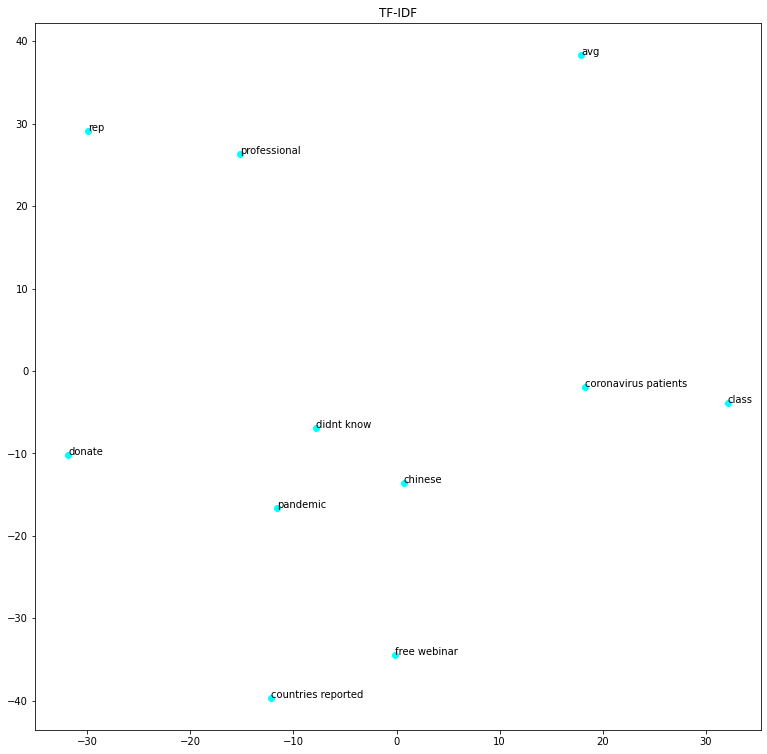

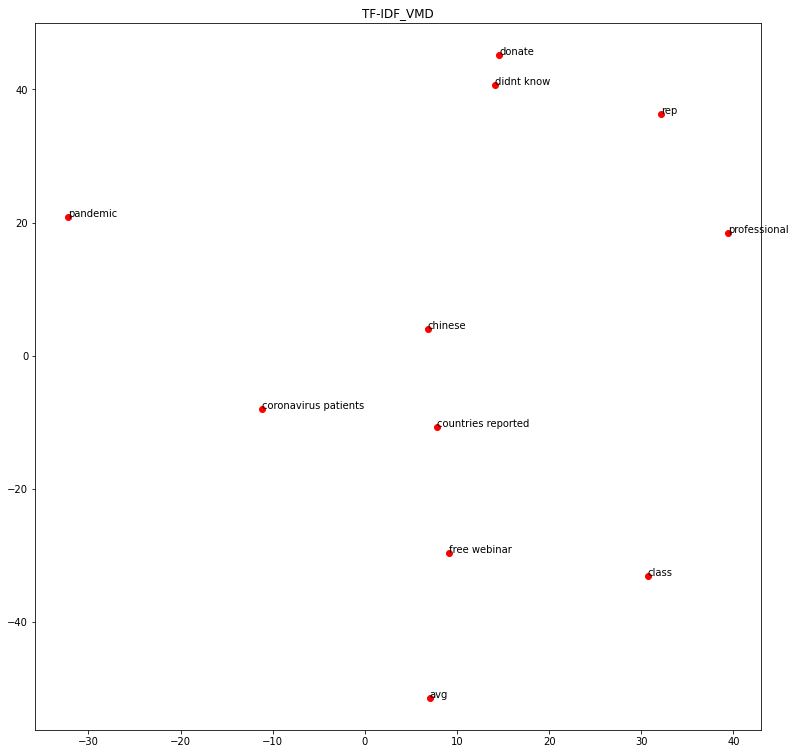

In [114]:
plt.figure(figsize=(13,13))
for i in a:
    plt.scatter(VMD_embedded[i][0], VMD_embedded[i][1], c='red')
    plt.annotate(words[i], VMD_embedded[i], xytext=None, xycoords='data', textcoords='data', arrowprops=None)
    plt.title("TF-IDF_VMD")
plt.show()

In [90]:
a

array([2587, 3263, 2437, 3036, 2095, 4367, 3183,  722, 3827, 2362, 2992])

In [115]:
for i in a:
    print(words[i])

free webinar
professional
avg
countries reported
donate
didnt know
chinese
class
rep
pandemic
coronavirus patients
